# Samin Intisar

## Research question/interests

The goal of my analysis is to find which attributes are dominated by the players based on their positions.

In [20]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import project_functions1 as p1

In [21]:
#Theme
sns.set_theme(context = 'notebook',
              style = 'darkgrid',
              palette = 'deep',
              font = 'sans-serif',
              font_scale = 1,
              color_codes = True,
              rc = None)

### Loading Data

In [22]:
df = p1.load()

df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,32,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,29,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,Charles Abi,FRA,FW,Saint-Étienne,Ligue 1,22.0,2000,1,1,...,0.00,2.00,0.00,0.00,0.00,0.00,4.00,2.00,0.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,26,...,0.10,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0
2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,29,...,0.00,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4
2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,32,...,0.10,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5
2919,2920,Milan ?uri?,BIH,FW,Salernitana,Serie A,32.0,1990,33,23,...,0.25,0.29,0.17,0.04,0.00,0.00,3.24,12.40,4.81,72.0


# Cleaning the data

Removing the players that have played fewer than 300 minutes in the entire season. Only keeping forwards, midfielders and defenders for analysis.

In [23]:
df = p1.remove_players(df).reset_index()

df

,index,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,0,1,Max Aarons,ENG,DF,Norwich City,Premier League,22.0,2000,34,...,0.03,1.41,1.16,0.00,0.06,0.03,5.53,0.47,1.59,22.7
1,1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34.0,1987,34,...,0.00,0.06,1.39,0.00,0.03,0.00,6.77,2.02,1.36,59.8
2,2,3,Salis Abdul Samed,GHA,MF,Clermont Foot,Ligue 1,22.0,2000,31,...,0.00,0.36,1.24,0.00,0.00,0.00,8.76,0.88,0.88,50.0
3,3,4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29.0,1993,34,...,0.03,0.79,2.23,0.00,0.00,0.00,8.87,0.43,0.43,50.0
4,5,6,Dickson Abiama,NGA,FW,Greuther Fürth,Bundesliga,23.0,1998,24,...,1.85,0.25,0.86,0.00,0.00,0.00,4.81,2.72,4.94,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2915,2916,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,25.0,1997,26,...,0.05,0.22,0.82,0.00,0.05,0.00,9.18,2.62,2.13,55.2
1494,2916,2917,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23.0,1999,36,...,0.10,0.10,1.08,0.00,0.00,0.00,9.41,2.64,1.42,65.0
1495,2917,2918,Szymon ?urkowski,POL,MF,Empoli,Serie A,24.0,1997,35,...,0.00,0.74,1.91,0.00,0.04,0.00,8.05,1.02,1.56,39.4
1496,2918,2919,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23.0,1998,36,...,0.10,0.84,0.81,0.00,0.06,0.00,7.44,0.55,0.81,40.5


# Restructuring the data

In [39]:
#Creating new data frames based on player positions
forwards = p1.forwards(df).reset_index(drop = True)
midfielders = p1.midfielders(df).reset_index(drop = True)
defenders = p1.defenders(df).reset_index(drop = True)

In [40]:
forwards

,Pos,Goals,Shots,G/Sh,Assists,PasCmp,Touches,DriPast,CarTotDist,Crs,GCA,TklWon,Press,Clr,Int,Blocks,Fls,AerWon
0,FW,0.00,2.22,0.00,0.12,11.1,33.0,0.86,74.7,0.25,0.25,0.86,23.50,0.86,0.99,1.23,2.22,2.72
1,FW,0.50,2.71,0.15,0.12,14.6,32.4,1.14,76.8,0.70,0.35,0.64,13.60,0.90,0.44,0.96,1.25,2.39
2,FW,0.31,2.16,0.14,0.13,14.8,33.7,0.75,83.0,0.48,0.18,0.40,14.60,0.66,0.44,1.10,1.37,2.47
3,FW,0.39,1.94,0.15,0.26,22.0,41.5,0.63,72.2,0.59,0.30,0.82,17.10,1.05,0.49,0.79,1.32,5.07
4,FW,0.82,3.15,0.26,0.00,14.5,34.5,1.51,90.1,0.41,0.55,0.55,14.00,0.82,0.41,0.96,1.10,2.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,FW,0.09,3.20,0.03,0.05,18.0,44.2,2.65,229.5,1.32,0.41,0.55,16.70,0.27,0.68,0.73,2.60,0.73
267,FW,0.52,4.08,0.09,0.21,22.3,45.3,1.73,166.0,1.73,0.42,0.21,8.64,0.37,0.42,0.68,1.68,2.15
268,FW,0.44,2.44,0.18,0.67,20.7,42.2,3.56,152.2,1.78,0.67,0.22,15.80,0.00,0.44,0.89,0.89,0.00
269,FW,0.45,1.67,0.27,0.30,18.2,30.0,0.30,63.8,1.67,0.30,0.30,17.10,0.30,0.45,0.61,2.42,1.21


In [41]:
midfielders

,Pos,Goals,Shots,G/Sh,Assists,PasCmp,Touches,DriPast,CarTotDist,Crs,GCA,TklWon,Press,Clr,Int,Blocks,Fls,AerWon
0,MF,0.04,0.66,0.06,0.00,55.9,70.4,1.09,246.5,0.36,0.04,1.24,23.4,0.55,1.86,0.99,1.64,0.88
1,MF,0.00,0.91,0.00,0.06,40.7,61.6,1.34,171.9,0.79,0.15,2.23,28.0,0.34,2.56,1.68,1.40,0.43
2,MF,0.00,0.13,0.00,0.07,52.8,71.0,0.67,229.6,0.20,0.27,1.07,21.7,1.33,1.53,2.13,1.33,1.53
3,MF,0.00,0.41,0.00,0.00,44.1,57.6,0.20,150.0,0.41,0.00,1.63,26.1,0.61,1.02,1.02,2.86,1.22
4,MF,0.00,0.77,0.00,0.00,39.8,57.6,1.01,173.7,0.19,0.05,2.02,18.3,1.54,2.69,1.83,1.68,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,MF,0.08,1.31,0.00,0.00,30.1,48.5,0.46,160.2,1.15,0.15,0.69,16.8,0.62,1.38,1.62,1.85,0.62
450,MF,0.26,1.85,0.14,0.22,41.6,58.8,0.95,191.3,0.86,0.52,0.60,14.3,0.17,0.65,1.08,0.82,0.30
451,MF,0.07,0.73,0.10,0.03,43.2,59.9,0.42,192.6,0.10,0.03,1.08,13.7,2.26,1.74,1.35,1.60,2.64
452,MF,0.23,1.84,0.13,0.08,28.6,51.7,1.17,260.4,0.74,0.16,1.91,18.6,1.17,2.23,2.03,1.95,1.02


In [42]:
defenders

,Pos,Goals,Shots,G/Sh,Assists,PasCmp,Touches,DriPast,CarTotDist,Crs,GCA,TklWon,Press,Clr,Int,Blocks,Fls,AerWon
0,DF,0.00,0.41,0.00,0.06,34.0,58.0,1.09,199.4,1.41,0.16,1.16,13.60,2.19,1.75,2.69,0.97,0.47
1,DF,0.06,0.54,0.11,0.00,38.7,57.3,0.48,204.7,0.06,0.03,1.39,13.60,3.20,3.11,1.87,1.30,2.02
2,DF,0.00,0.32,0.00,0.00,31.3,46.8,0.00,129.5,0.00,0.16,0.97,5.65,6.29,1.77,2.10,0.81,1.94
3,DF,0.14,0.57,0.25,0.00,64.3,80.2,0.11,284.8,0.04,0.07,0.43,5.85,4.08,1.70,1.70,0.71,2.84
4,DF,0.04,0.68,0.06,0.12,62.3,88.0,1.91,292.9,4.94,0.12,1.55,11.70,1.20,1.24,1.43,1.63,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,DF,0.00,0.42,0.00,0.00,33.2,53.0,1.13,122.5,0.14,0.00,2.39,14.50,2.54,2.96,1.97,1.83,2.54
769,DF,0.00,0.41,0.00,0.00,35.8,52.1,0.55,158.5,0.27,0.07,0.68,12.40,4.11,2.26,1.58,1.30,4.18
770,DF,0.00,1.03,0.00,0.34,81.6,99.4,0.52,321.0,2.41,0.86,0.95,8.10,1.12,1.55,1.55,0.95,1.47
771,DF,0.04,0.30,0.14,0.00,36.6,52.2,0.13,147.1,0.09,0.00,0.22,4.63,6.06,2.03,1.65,0.52,2.38


# Saving the processed data

In [43]:
frames = [forwards, midfielders, defenders]
processed = pd.concat(frames).reset_index(drop = True)

processed.to_csv('../data/processed/processed.csv')

# Data frames based on player positions

In [10]:
forwards.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,271.0,0.374317,0.221258,0.00,0.210,0.35,0.505,1.08
Shots,271.0,2.572177,0.725208,0.45,2.095,2.46,3.030,4.86
G/Sh,271.0,0.128635,0.066249,0.00,0.080,0.13,0.170,0.36
Assists,271.0,0.137638,0.131882,0.00,0.040,0.12,0.200,0.83
PasCmp,271.0,18.596162,7.558521,7.11,13.500,16.60,21.150,48.90
Touches,271.0,38.164576,9.486099,20.60,31.450,35.80,42.150,76.30
DriPast,271.0,1.172546,0.761007,0.00,0.610,1.05,1.520,5.29
CarTotDist,271.0,119.661255,67.390379,30.60,70.950,100.50,149.150,381.80
Crs,271.0,0.989041,0.828857,0.00,0.430,0.71,1.360,6.11
GCA,271.0,0.328819,0.210697,0.00,0.180,0.28,0.470,1.13


In [11]:
midfielders.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,454.0,0.082247,0.099088,0.00,0.0000,0.05,0.130,0.61
Shots,454.0,1.088656,0.601857,0.00,0.6700,1.01,1.420,3.15
G/Sh,454.0,0.064273,0.078382,0.00,0.0000,0.05,0.100,0.50
Assists,454.0,0.083568,0.095742,0.00,0.0000,0.06,0.130,0.63
PasCmp,454.0,40.434361,13.394111,14.60,30.6000,38.65,47.875,96.10
Touches,454.0,59.890308,13.118064,27.40,49.9000,58.85,67.975,109.60
DriPast,454.0,0.929163,0.612391,0.00,0.5200,0.79,1.210,4.26
CarTotDist,454.0,190.271366,62.540534,57.40,145.2750,181.95,230.200,398.50
Crs,454.0,0.780727,0.746994,0.00,0.2700,0.56,1.050,4.12
GCA,454.0,0.207269,0.176648,0.00,0.0800,0.17,0.290,0.99


In [12]:
defenders.describe().T

,count,mean,std,min,25%,50%,75%,max
Goals,773.0,0.043687,0.063527,0.00,0.00,0.00,0.07,0.50
Shots,773.0,0.560259,0.357065,0.00,0.32,0.51,0.73,2.94
G/Sh,773.0,0.070996,0.103596,0.00,0.00,0.00,0.12,1.00
Assists,773.0,0.050906,0.076271,0.00,0.00,0.00,0.08,0.43
PasCmp,773.0,42.803105,12.791294,16.70,33.50,40.10,49.60,87.20
Touches,773.0,63.148900,12.307331,30.20,54.10,61.20,70.10,105.30
DriPast,773.0,0.542794,0.516187,0.00,0.16,0.39,0.77,4.15
CarTotDist,773.0,196.193790,65.439225,57.70,147.80,187.20,231.30,455.40
Crs,773.0,1.111902,1.200015,0.00,0.09,0.54,1.96,5.95
GCA,773.0,0.113959,0.124473,0.00,0.00,0.08,0.17,0.86


In [13]:
y1 = fw_mean = forwards.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]
y2 = mf_mean = midfielders.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]
y3 = df_mean = defenders.describe().loc['mean', ["Goals", "Shots", "Assists", "DriPast", "Crs", "GCA", "TklWon", "Clr", "Int", "Blocks", "Fls", "AerWon"]]

x = np.arange(len(y1))

# Correlation between footballers' attributes

<AxesSubplot:>

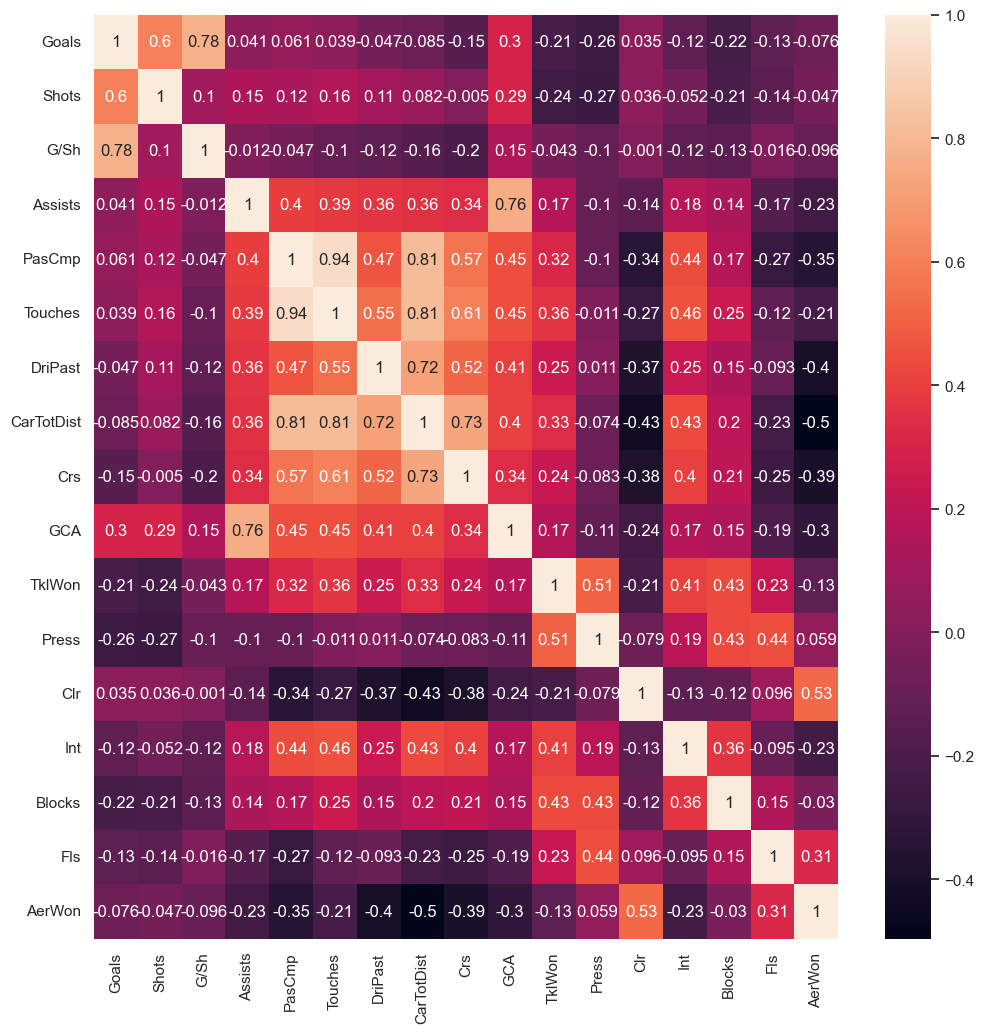

In [14]:
correlation = forwards.corr()

fig, ax = plt.subplots(figsize=(12,12))  
sns.heatmap(correlation,
            xticklabels = correlation.columns,
            yticklabels = correlation.columns,
            annot = True)

# Visualizing the data to compare the attributes of footballers in each positions

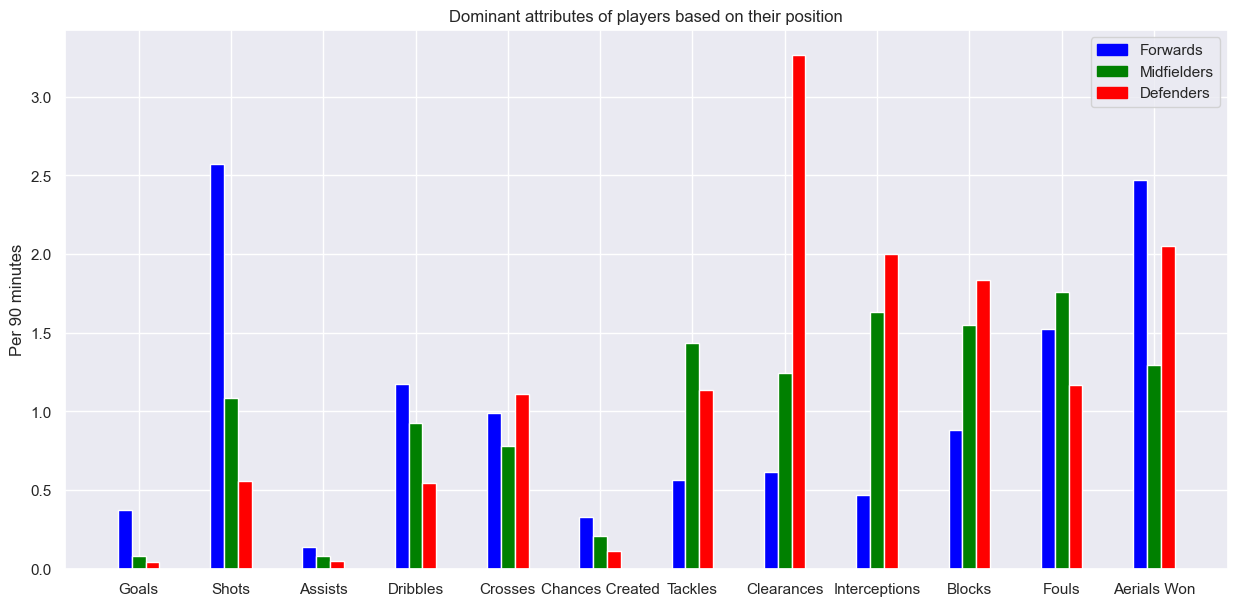

In [15]:
#Bar Plot
f, ax = plt.subplots(figsize=(15,7))
bar_width = 0.15
plt.bar(x, y1, width = bar_width, color = 'blue')
plt.bar(x + bar_width, y2, width = bar_width, color = 'green')
plt.bar(x + bar_width*2, y3, width = bar_width, color = 'red')

#Labels
plt.xticks(x + bar_width, ['Goals', 'Shots', 'Assists', 'Dribbles', 'Crosses', 'Chances Created', 'Tackles', 'Clearances', 'Interceptions', 'Blocks', 'Fouls', 'Aerials Won'])
plt.title('Dominant attributes of players based on their position')
plt.ylabel('Per 90 minutes')

#Legend
colors = {'Forwards':'blue', 'Midfielders':'green', 'Defenders':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

Here we can see that the stats that directly relate to involvement in the goal scoring are dominated by the forwards. The midfielders show prowess in both the attacking and defensive attributes. The more defensive attributes such as tackles, blocks, interceptions and clearances are dominated by the defenders.

### Comparing how much passes are completed by players in each position. Also taking a look at how much distance the players cover with a ball in their feet.

[Text(0.5, 1.0, 'Box plot of Passes Completed by each positions'),
 Text(0.5, 0, 'Positions'),
 Text(0, 0.5, 'Passes completed per 90 minutes')]

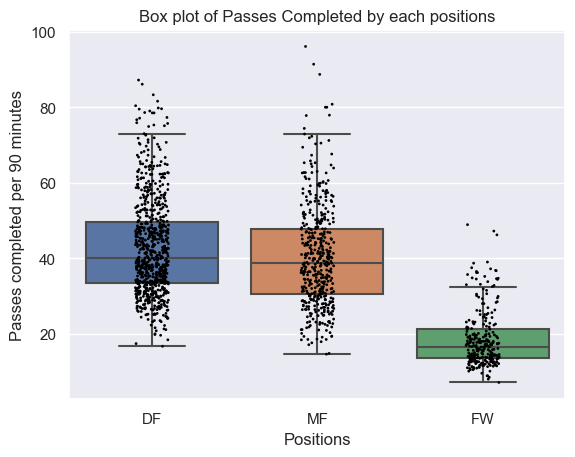

In [17]:
passes = df[['Pos', 'PasCmp']]

bp = sns.boxplot(data = passes,
                 x = 'Pos',
                 y = 'PasCmp',
                 showfliers = False)

sns.stripplot(data = passes,
              x = 'Pos',
              y = 'PasCmp',
              size = 2,
              color = 'black')

bp.set(title = "Box plot of Passes Completed by each positions",
       xlabel = 'Positions',
       ylabel = 'Passes completed per 90 minutes')

Here we can see that the forwards pass the ball much less than than the midfielders and defenders.

[Text(0.5, 1.0, 'Box plot of Yards Covered by each positions'),
 Text(0.5, 0, 'Positions'),
 Text(0, 0.5, 'Yards covered with the ball per 90 minutes')]

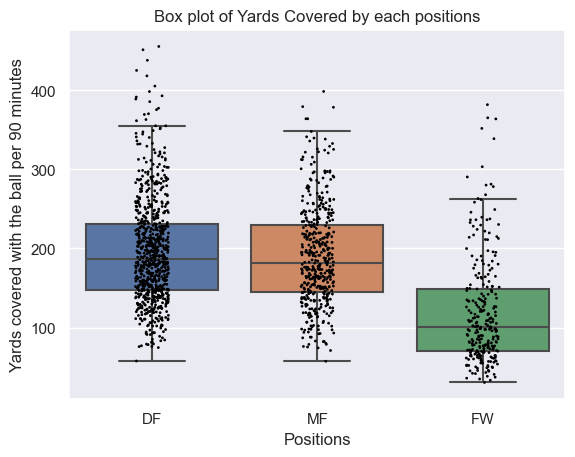

In [19]:
passes = df[['Pos', 'CarTotDist']]

bp = sns.boxplot(data = passes,
                 x = 'Pos',
                 y = 'CarTotDist',
                 showfliers = False)

sns.stripplot(data = passes,
              x = 'Pos',
              y = 'CarTotDist',
              size = 2,
              color = 'black')

bp.set(title = "Box plot of Yards Covered by each positions",
       xlabel = 'Positions',
       ylabel = 'Yards covered with the ball per 90 minutes')

Here we can see that the bars look quite similar to the passes. Again the forwards are doing much worse than the other two positions.

Text(0, 0.5, 'Touches per 90 minutes')

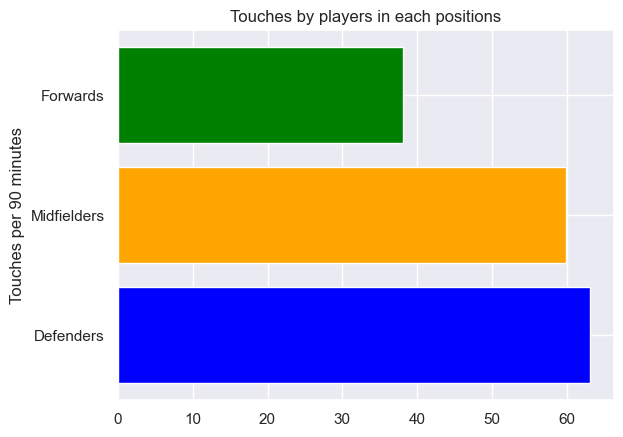

In [55]:
#Bar Plot
touches = [defenders.Touches.mean(), midfielders.Touches.mean(), forwards.Touches.mean()]
positions = ['Defenders', 'Midfielders', 'Forwards']
c = ['blue', 'orange', 'green']

plt.barh(y = positions,
         width = touches,
         color = c)

plt.title('Touches by players in each positions')
plt.ylabel("Touches per 90 minutes")

Forwards touch the ball much less than the midfielders and defenders.

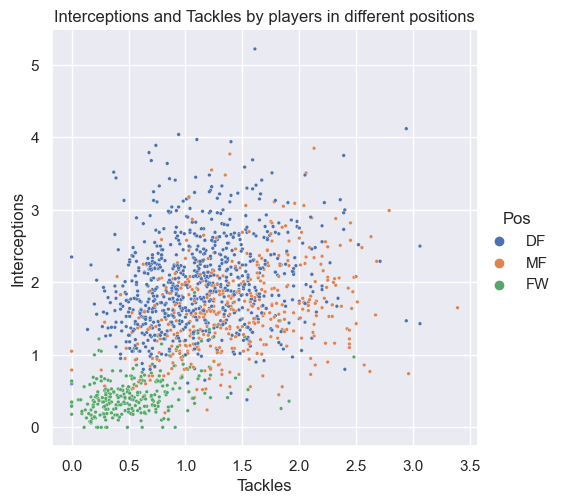

In [27]:
#Scatter Plot
sns.relplot(x = 'TklWon',
            y = 'Int',
            hue = 'Pos',
            data = df,
            s = 7).set(xlabel = 'Tackles',
                       ylabel = 'Interceptions',
                       title = 'Interceptions and Tackles by players in different positions')

Tackles and interceptions are both defensive attributes. We can see that midfielders are involved more in interceptions but defenders are more involved in tackles, while forwards are lagging behind on these attributes again.

### Observations
We can see a trend in passes completed, touches and distance covered. The midfielders and defenders dominate these attributes in the game. They are head to head with each other, whilst the forwards are lagging behind. When it comes to tackles and interceptions, we can again see that the forwards are contributing much less than the other two positions. However, we can observe in the scatter plot that defenders  intercept more and midfielders tackle more. The forwards dominate on the attacking attributes such as goals and shots.

### Conclusions
Midfielders and Defenders have similar play styles. They dominate on the same attributes and are weak in the same attributes. When it comes to most attributes, the forwards have less contribution. They spend less time on the ball and they touch the ball fewer times than everyone else. Overall, midfielders and defenders are more involved in the game. Therefore, we can conclude that in an average football match the forwards will be on-screen fewer times on screen than the rest.